In [2]:
# Light weight module for fault prediction: Using various ML models:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Data Pre-processing:
# Load your data (modify the file path as necessary)
data = pd.read_csv('engine_data.csv')

# Define features and target
features = [col for col in data.columns if col not in ['Engine Condition', 'RUL']]
target = 'Engine Condition'

# Split the data into training and testing sets
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for optimal model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Build and Train lightwt models:

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

# Train and evaluate each model
model_results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calculate and store evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    model_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Display model results
for model_name, metrics in model_results.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']:.3f}, Precision: {metrics['Precision']:.3f}, "
          f"Recall: {metrics['Recall']:.3f}, F1 Score: {metrics['F1 Score']:.3f}")


Logistic Regression - Accuracy: 0.650, Precision: 0.670, Recall: 0.872, F1 Score: 0.758
Decision Tree - Accuracy: 0.650, Precision: 0.667, Recall: 0.882, F1 Score: 0.759
Naive Bayes - Accuracy: 0.647, Precision: 0.670, Recall: 0.858, F1 Score: 0.753
Random Forest - Accuracy: 0.656, Precision: 0.668, Recall: 0.895, F1 Score: 0.765
K-Nearest Neighbors - Accuracy: 0.616, Precision: 0.681, Recall: 0.730, F1 Score: 0.704


In [6]:
# Real Time Fault Prediction Simulation:

def real_time_fault_prediction(data_row, model, scaler):
    # Preprocess and scale the incoming data row (excluding the target column)
    data_row_scaled = scaler.transform([data_row])
    prediction = model.predict(data_row_scaled)

    if prediction == 1:
        return "Fault Detected"
    else:
        return "No Fault Detected"

# Example usage
example_data_row = X.iloc[1]  # Replace with real-time data row when available
selected_model = models["Random Forest"]  # Or choose the best-performing model from the results
print(real_time_fault_prediction(example_data_row, selected_model, scaler))


Fault Detected


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


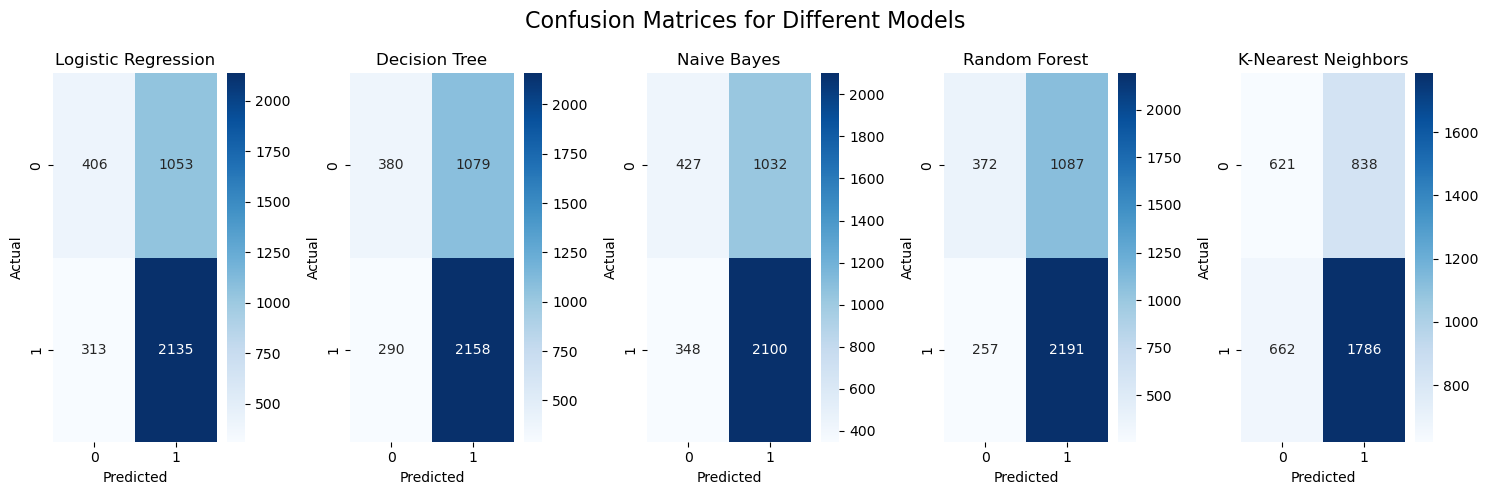

In [8]:
# Visualizing the Results:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc


# Confusion Matrix for each model:

def plot_confusion_matrices(models, X_test, y_test):
    fig, axes = plt.subplots(1, len(models), figsize=(15, 5))
    fig.suptitle("Confusion Matrices for Different Models", fontsize=16)

    for i, (model_name, model) in enumerate(models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(model_name)
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

# Plot confusion matrices
plot_confusion_matrices(models, X_test_scaled, y_test)


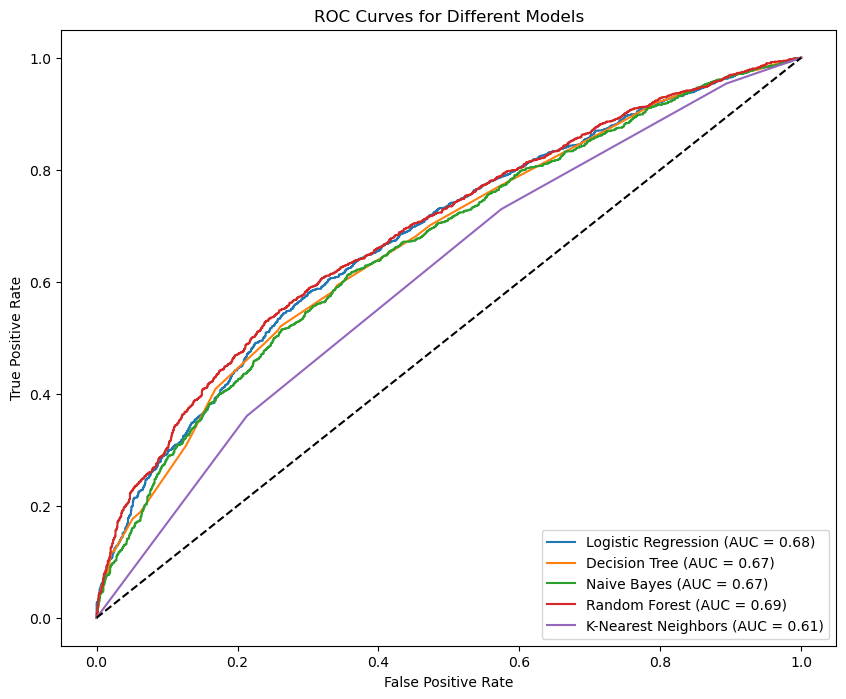

In [10]:
# ROC curves for each model:

def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for Different Models")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves
plot_roc_curves(models, X_test_scaled, y_test)


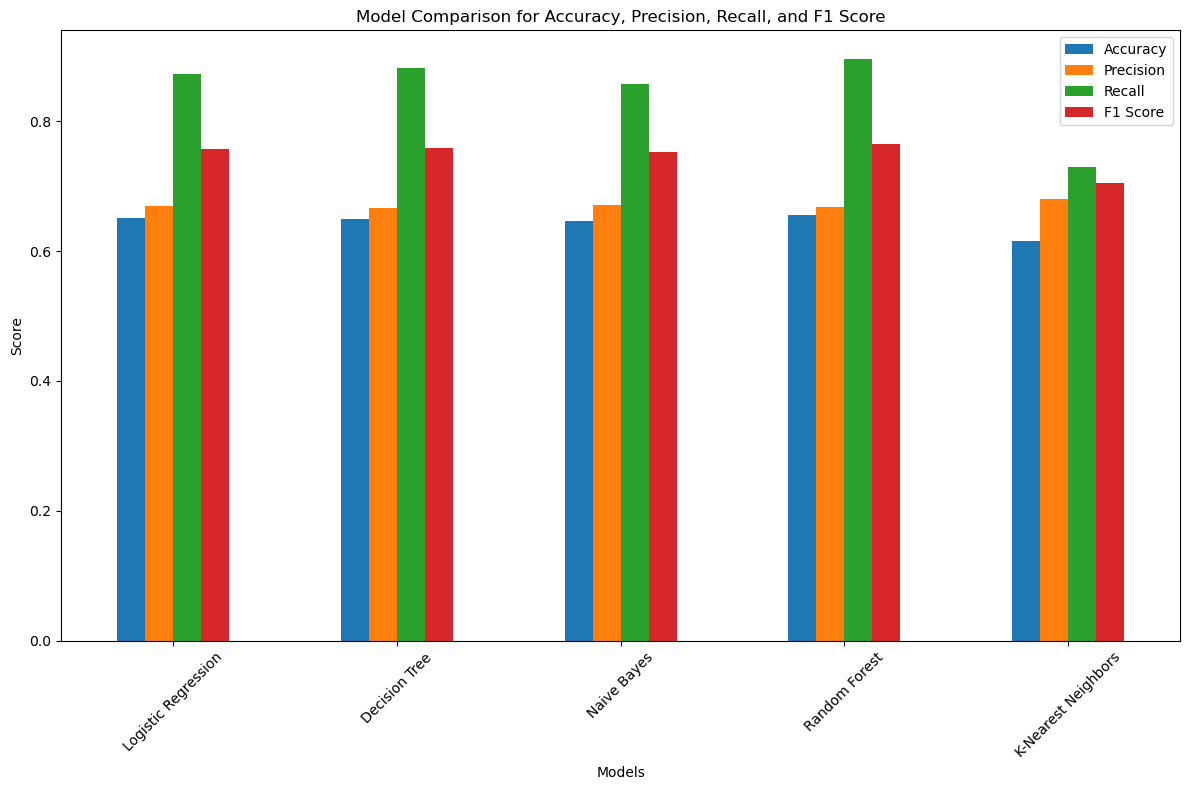

In [12]:
# Compare Metrics with Bar Plots

def plot_metrics_bar_chart(model_results):
    metrics_df = pd.DataFrame(model_results).T  # Transpose for easier plotting
    metrics_df.plot(kind="bar", figsize=(12, 8))
    plt.title("Model Comparison for Accuracy, Precision, Recall, and F1 Score")
    plt.ylabel("Score")
    plt.xlabel("Models")
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

# Plot metrics comparison
plot_metrics_bar_chart(model_results)


AttributeError: 'dict' object has no attribute 'save'